# Polarized observations

This tutorial covers working with polarized instrument and maps, and recovering polarized maps from observations.

We start with a normal instrument, and create two orthogonally polarized copies of each detector by setting ``polarized: True`` in the ``Array`` config:

In [1]:
import maria
from maria.instrument import Band

f090 = Band(
    center=90e9,  # in Hz
    width=20e9,  # in Hz
    NET_RJ=40e-6,  # in K sqrt(s)
    knee=1e0,    # in Hz
    gain_error=5e-2)

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=60e-6, 
    knee=1e0, 
    gain_error=5e-2)

array = {"field_of_view": 0.5, 
         "shape": "circle", 
         "beam_spacing": 1.5,
         "primary_size": 10, 
         "polarized": True,
         "bands": [f090, f150]}

instrument = maria.get_instrument(array=array)

print(instrument.arrays)

          n     FOV baseline        bands polarized
array1  652  0.478°      0 m  [f090,f150]      True


We can see the resulting polarization footprint in the instrument plot:

Instrument(1 array)
├ arrays:
│            n     FOV baseline        bands polarized
│  array1  652  0.478°      0 m  [f090,f150]      True
│ 
└ bands:
      name   center   width    η         NEP      NET_RJ         NET_CMB     FWHM
   0  f090   90 GHz  20 GHz  0.5  5.445 aW√s  40 uK_RJ√s  49.13 uK_CMB√s   1.458’
   1  f150  150 GHz  30 GHz  0.5  12.25 aW√s  60 uK_RJ√s    104 uK_CMB√s  0.8748’


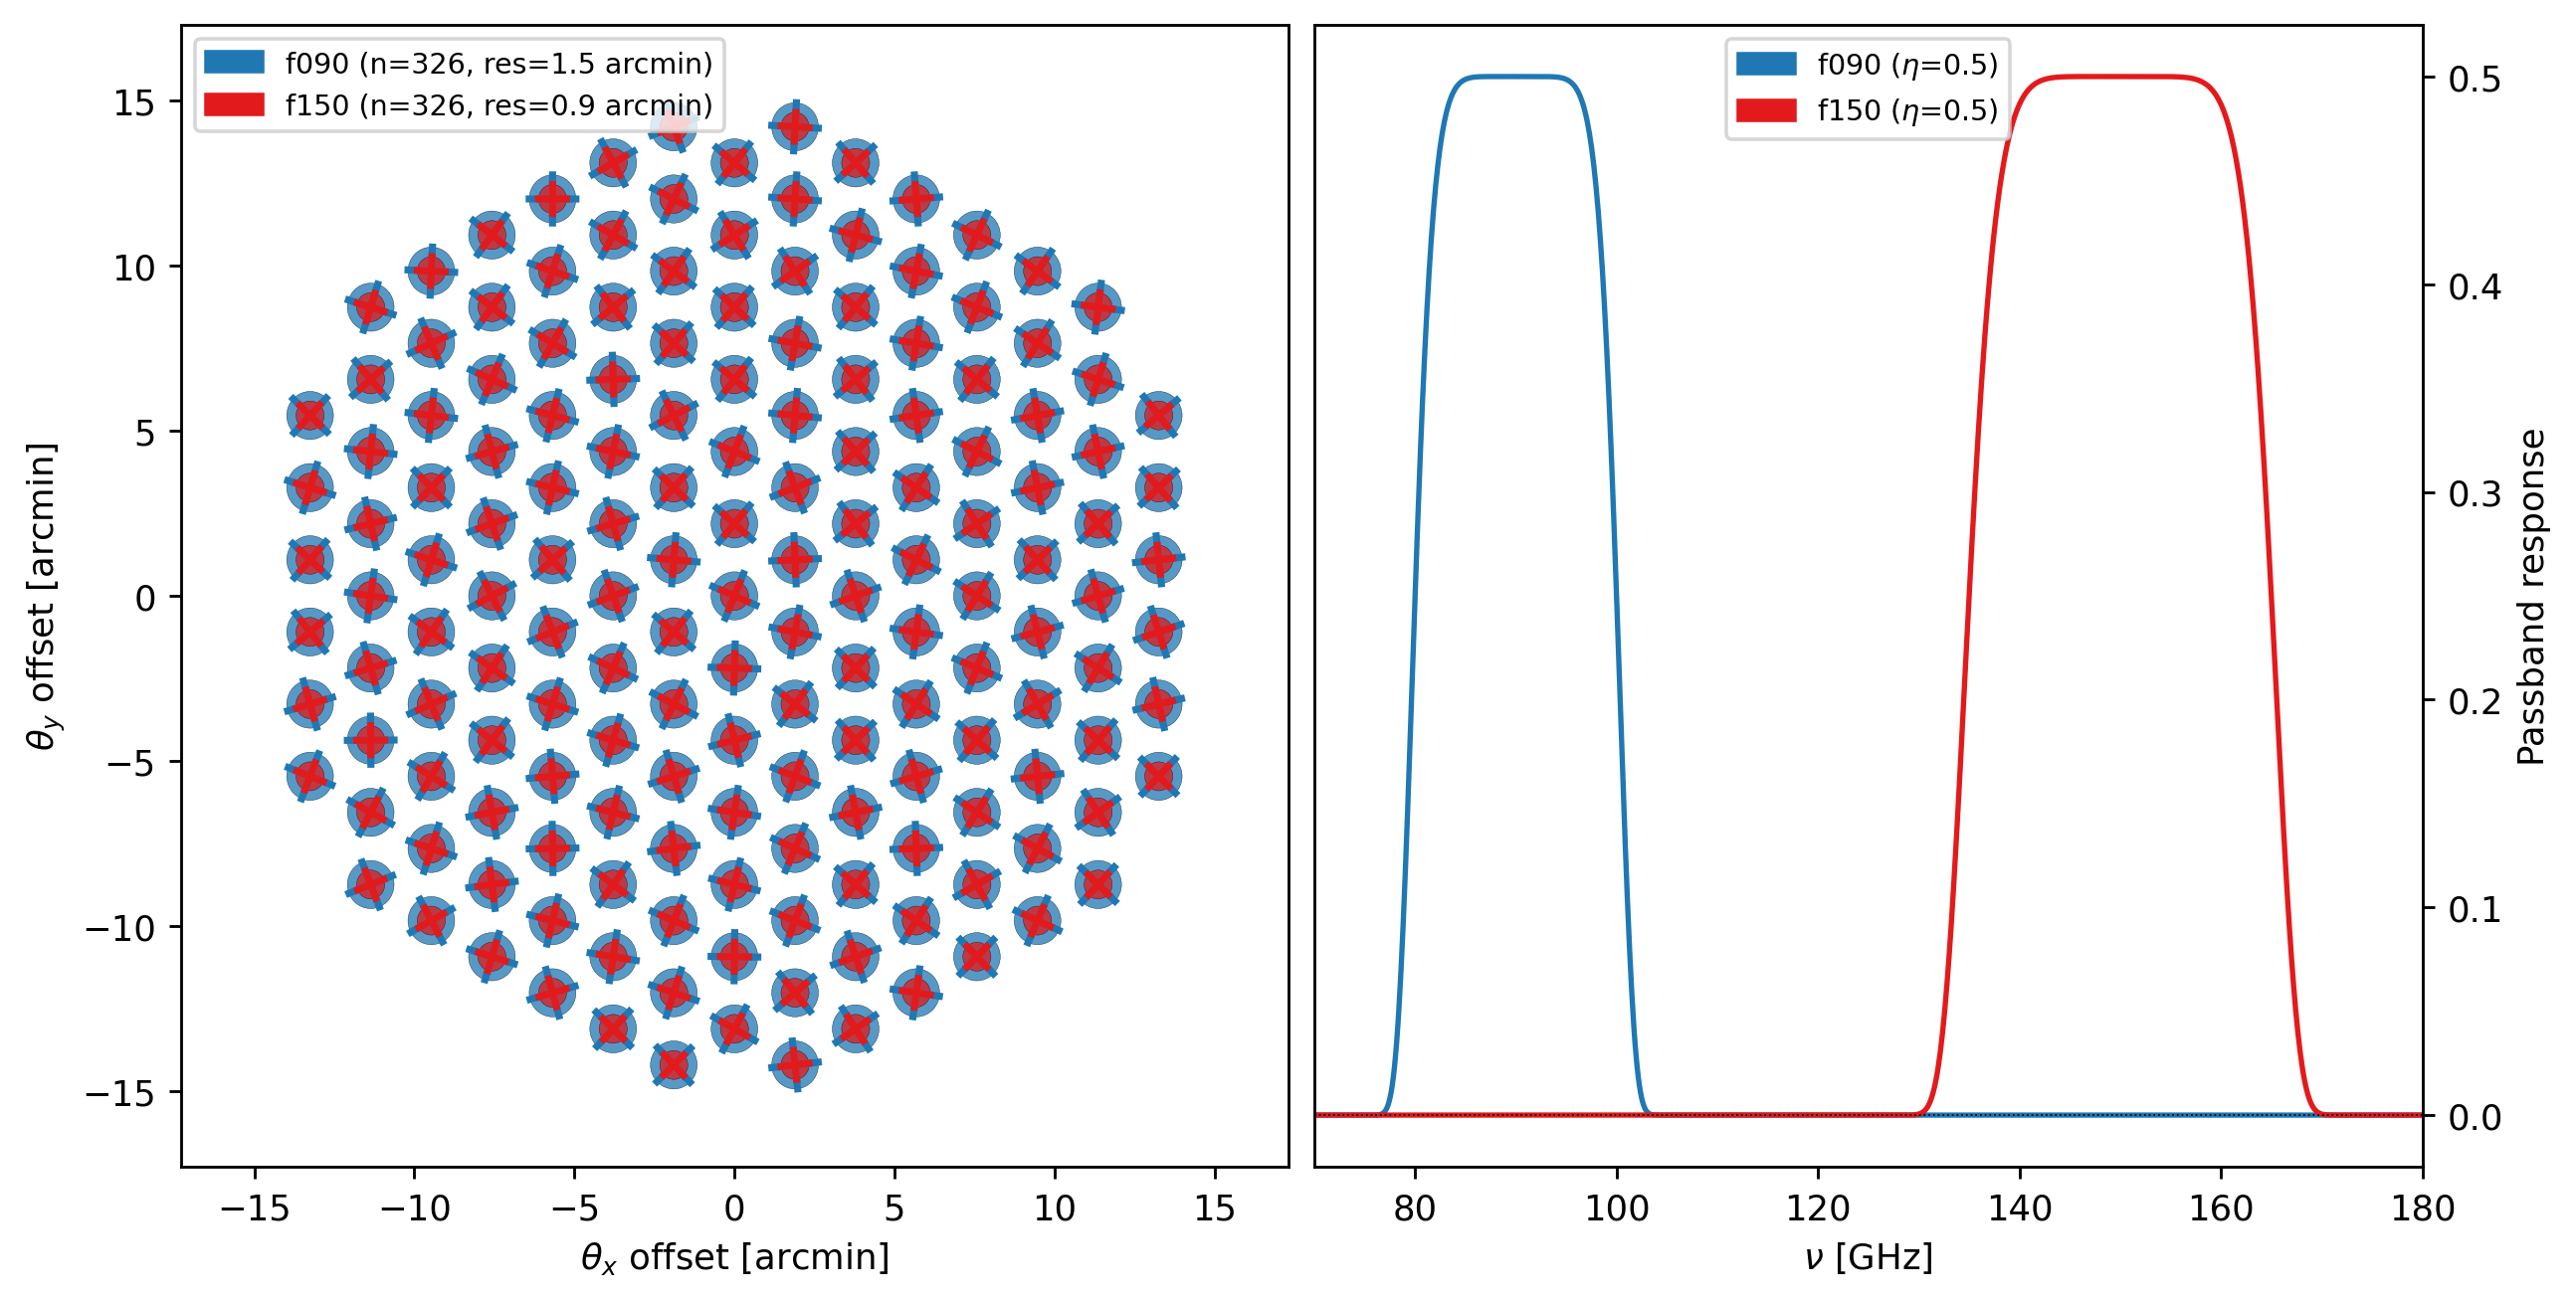

In [2]:
print(instrument)
instrument.plot()

Let's observe the use the Einstein map, which has a faint polarization signature underneath the unpolarized signal of Einstein's face. Remember that all maps are five dimensional (stokes, frequency, time, y, x); this map has four channels in the stokes dimensions (the I, Q, U, and V [Stokes parameters](https://en.wikipedia.org/wiki/Stokes_parameters)). We can plot all the channels by giving ``plot`` a shaped set of stokes parameters.

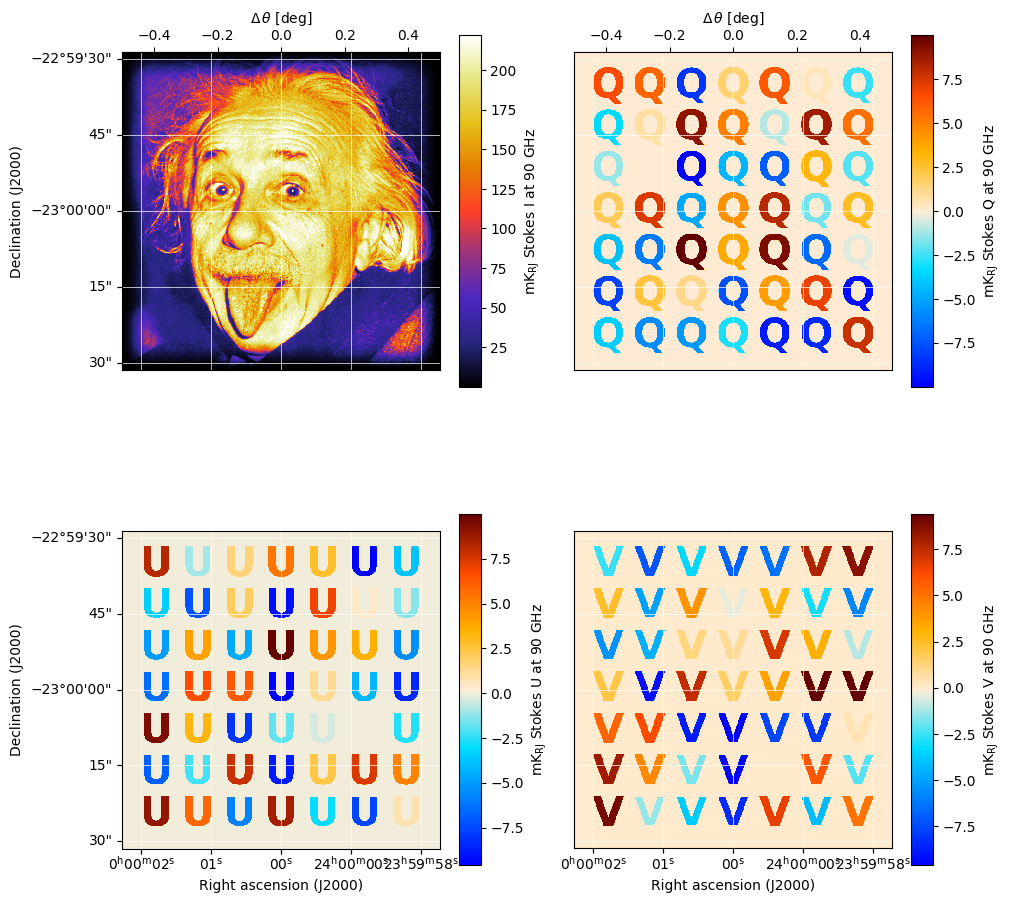

In [3]:
from maria.io import fetch

input_map = maria.map.load(fetch("maps/einstein.h5"))
input_map.plot(stokes=[["I", "Q"], 
                       ["U", "V"]])

PlanList(2 plans, 900 s):
                           start_time duration   target(ra,dec)  \
chunk                                                             
0      2025-08-15 04:46:35.084 +00:00    600 s     (360°, -23°)   
1      2025-08-15 04:57:12.584 +00:00    300 s  (360°, -22.99°)   

          center(az,el)  
chunk                    
0      (95.91°, 61.21°)  
1      (95.44°, 63.08°)  


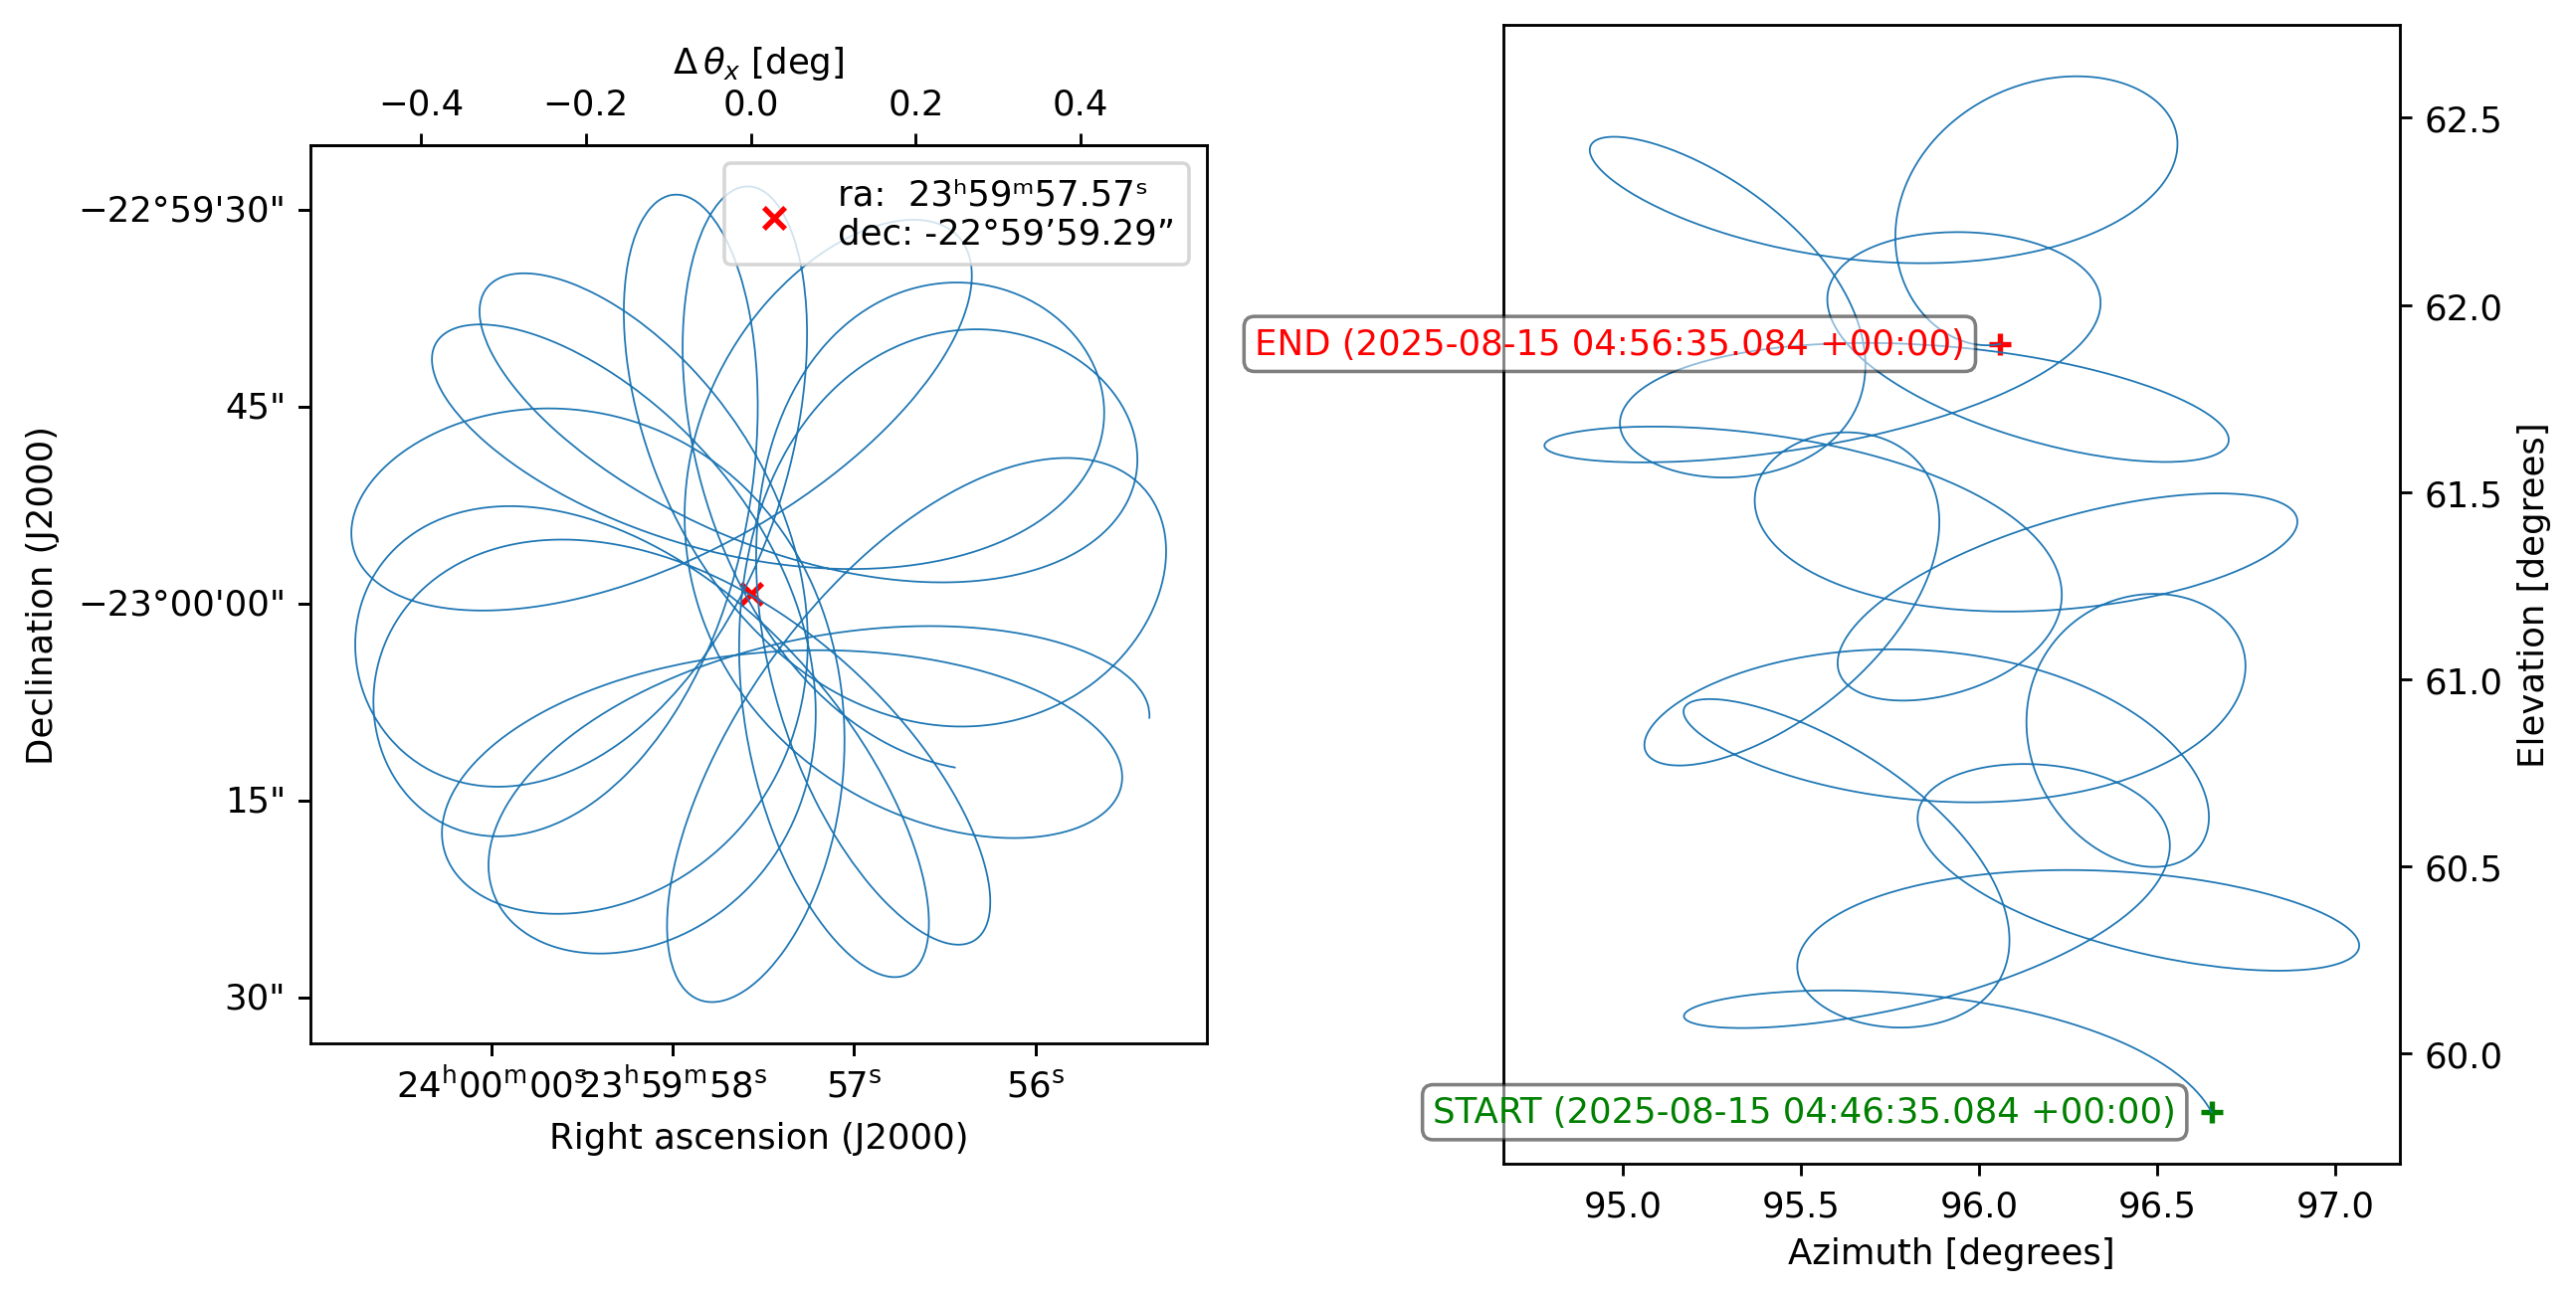

In [4]:
from maria import Planner

planner = Planner(target=input_map, site="llano_de_chajnantor", constraints={"el": (60, 90)})
plans = planner.generate_plans(total_duration=900,  # in seconds
                               sample_rate=50)  # in Hz

plans[0].plot()
print(plans)

In [5]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="llano_de_chajnantor",
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 0.5}},
    map=input_map
)

print(sim)

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n     FOV baseline        bands polarized
│ │  array1  652  0.478°      0 m  [f090,f150]      True
│ │ 
│ └ bands:
│       name   center   width    η         NEP      NET_RJ         NET_CMB     FWHM
│    0  f090   90 GHz  20 GHz  0.5  5.445 aW√s  40 uK_RJ√s  49.13 uK_CMB√s   1.458’
│    1  f150  150 GHz  30 GHz  0.5  12.25 aW√s  60 uK_RJ√s    104 uK_CMB√s  0.8748’
├ Site:
│   region: chajnantor
│   timezone: America/Santiago
│   location:
│     longitude: 67°45’17.28” W
│     latitude:  23°01’45.84” S
│     altitude: 5064 m
│   seasonal: True
│   diurnal: True
├ PlanList(2 plans, 900 s):
│                            start_time duration   target(ra,dec)  \
│ chunk                                                             
│ 0      2025-08-15 04:46:35.084 +00:00    600 s     (360°, -23°)   
│ 1      2025-08-15 04:57:12.584 +00:00    300 s  (360°, -22.99°)   
│ 
│           center(az,el)  
│ chunk                    
│ 0      (

2025-08-14 15:47:20.379 INFO: Simulating observation 1 of 2


Constructing atmosphere:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing atmosphere:  10%|█         | 1/10 [00:04<00:40,  4.55s/it]

Constructing atmosphere:  20%|██        | 2/10 [00:08<00:35,  4.43s/it]

Constructing atmosphere:  30%|███       | 3/10 [00:14<00:36,  5.17s/it]

Constructing atmosphere:  40%|████      | 4/10 [00:19<00:29,  4.85s/it]

Constructing atmosphere:  50%|█████     | 5/10 [00:23<00:23,  4.70s/it]

Constructing atmosphere:  60%|██████    | 6/10 [00:27<00:17,  4.48s/it]

Constructing atmosphere:  70%|███████   | 7/10 [00:31<00:13,  4.33s/it]

Constructing atmosphere:  80%|████████  | 8/10 [00:36<00:08,  4.40s/it]

Constructing atmosphere:  90%|█████████ | 9/10 [00:41<00:04,  4.55s/it]

Constructing atmosphere: 100%|██████████| 10/10 [00:45<00:00,  4.56s/it]

Constructing atmosphere: 100%|██████████| 10/10 [00:45<00:00,  4.58s/it]

Generating turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Generating turbulence:  30%|███       | 3/10 [00:00<00:00, 25.39it/s]

Generating turbulence:  60%|██████    | 6/10 [00:00<00:00, 19.50it/s]

Generating turbulence:  90%|█████████ | 9/10 [00:00<00:00, 15.74it/s]

Generating turbulence: 100%|██████████| 10/10 [00:00<00:00, 16.03it/s]

Sampling turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Sampling turbulence:  10%|█         | 1/10 [00:01<00:11,  1.33s/it]

Sampling turbulence:  20%|██        | 2/10 [00:02<00:08,  1.03s/it]

Sampling turbulence:  30%|███       | 3/10 [00:03<00:06,  1.04it/s]

Sampling turbulence:  40%|████      | 4/10 [00:03<00:05,  1.07it/s]

Sampling turbulence:  50%|█████     | 5/10 [00:04<00:04,  1.07it/s]

Sampling turbulence:  60%|██████    | 6/10 [00:05<00:03,  1.09it/s]

Sampling turbulence:  70%|███████   | 7/10 [00:06<00:02,  1.10it/s]

Sampling turbulence:  80%|████████  | 8/10 [00:07<00:01,  1.11it/s]

Sampling turbulence:  90%|█████████ | 9/10 [00:08<00:00,  1.10it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:09<00:00,  1.07it/s]

Computing atmospheric emission:   0%|          | 0/2 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Computing atmospheric emission:  50%|█████     | 1/2 [00:01<00:01,  1.55s/it, band=f090]

Computing atmospheric emission:  50%|█████     | 1/2 [00:01<00:01,  1.55s/it, band=f150]

Computing atmospheric emission: 100%|██████████| 2/2 [00:02<00:00,  1.09it/s, band=f150]

Computing atmospheric emission: 100%|██████████| 2/2 [00:02<00:00,  1.01s/it, band=f150]

Sampling map:   0%|          | 0/2 [00:00<?, ?it/s]

Sampling map:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Sampling map:   0%|          | 0/2 [00:01<?, ?it/s, channel=(0 Hz, inf Hz)]

Sampling map:  50%|█████     | 1/2 [00:04<00:04,  4.59s/it, channel=(0 Hz, inf Hz)]

Sampling map:  50%|█████     | 1/2 [00:04<00:04,  4.59s/it, band=f150]             

Sampling map:  50%|█████     | 1/2 [00:06<00:04,  4.59s/it, channel=(0 Hz, inf Hz)]

Sampling map: 100%|██████████| 2/2 [00:08<00:00,  3.93s/it, channel=(0 Hz, inf Hz)]

Sampling map: 100%|██████████| 2/2 [00:08<00:00,  4.03s/it, channel=(0 Hz, inf Hz)]

Generating noise:   0%|          | 0/2 [00:00<?, ?it/s]

Generating noise:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Generating noise:  50%|█████     | 1/2 [00:00<00:00,  1.94it/s, band=f090]

Generating noise:  50%|█████     | 1/2 [00:00<00:00,  1.94it/s, band=f150]

Generating noise: 100%|██████████| 2/2 [00:00<00:00,  2.57it/s, band=f150]

Generating noise: 100%|██████████| 2/2 [00:00<00:00,  2.45it/s, band=f150]

2025-08-14 15:48:39.558 INFO: Simulated observation 1 of 2 in 79.17 s


2025-08-14 15:48:39.558 INFO: Simulating observation 2 of 2


Constructing atmosphere:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing atmosphere:  10%|█         | 1/10 [00:02<00:26,  2.96s/it]

Constructing atmosphere:  20%|██        | 2/10 [00:05<00:20,  2.53s/it]

Constructing atmosphere:  30%|███       | 3/10 [00:07<00:17,  2.47s/it]

Constructing atmosphere:  40%|████      | 4/10 [00:09<00:14,  2.35s/it]

Constructing atmosphere:  50%|█████     | 5/10 [00:11<00:11,  2.26s/it]

Constructing atmosphere:  60%|██████    | 6/10 [00:14<00:09,  2.26s/it]

Constructing atmosphere:  70%|███████   | 7/10 [00:16<00:06,  2.19s/it]

Constructing atmosphere:  80%|████████  | 8/10 [00:18<00:04,  2.19s/it]

Constructing atmosphere:  90%|█████████ | 9/10 [00:20<00:02,  2.24s/it]

Constructing atmosphere: 100%|██████████| 10/10 [00:22<00:00,  2.25s/it]

Constructing atmosphere: 100%|██████████| 10/10 [00:22<00:00,  2.30s/it]

Generating turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Generating turbulence:  40%|████      | 4/10 [00:00<00:00, 37.08it/s]

Generating turbulence:  80%|████████  | 8/10 [00:00<00:00, 29.05it/s]

Generating turbulence: 100%|██████████| 10/10 [00:00<00:00, 27.33it/s]

Sampling turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Sampling turbulence:  10%|█         | 1/10 [00:01<00:10,  1.18s/it]

Sampling turbulence:  20%|██        | 2/10 [00:01<00:06,  1.29it/s]

Sampling turbulence:  30%|███       | 3/10 [00:02<00:04,  1.51it/s]

Sampling turbulence:  40%|████      | 4/10 [00:02<00:03,  1.63it/s]

Sampling turbulence:  50%|█████     | 5/10 [00:03<00:02,  1.72it/s]

Sampling turbulence:  60%|██████    | 6/10 [00:03<00:02,  1.75it/s]

Sampling turbulence:  70%|███████   | 7/10 [00:04<00:01,  1.78it/s]

Sampling turbulence:  80%|████████  | 8/10 [00:04<00:01,  1.80it/s]

Sampling turbulence:  90%|█████████ | 9/10 [00:05<00:00,  1.80it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

Sampling turbulence: 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]

Computing atmospheric emission:   0%|          | 0/2 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Computing atmospheric emission:  50%|█████     | 1/2 [00:01<00:01,  1.21s/it, band=f090]

Computing atmospheric emission:  50%|█████     | 1/2 [00:01<00:01,  1.21s/it, band=f150]

Computing atmospheric emission: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s, band=f150]

Computing atmospheric emission: 100%|██████████| 2/2 [00:01<00:00,  1.40it/s, band=f150]

Sampling map:   0%|          | 0/2 [00:00<?, ?it/s]

Sampling map:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Sampling map:   0%|          | 0/2 [00:01<?, ?it/s, channel=(0 Hz, inf Hz)]

Sampling map:  50%|█████     | 1/2 [00:02<00:02,  2.95s/it, channel=(0 Hz, inf Hz)]

Sampling map:  50%|█████     | 1/2 [00:02<00:02,  2.95s/it, band=f150]             

Sampling map:  50%|█████     | 1/2 [00:03<00:02,  2.95s/it, channel=(0 Hz, inf Hz)]

Sampling map: 100%|██████████| 2/2 [00:04<00:00,  2.17s/it, channel=(0 Hz, inf Hz)]

Sampling map: 100%|██████████| 2/2 [00:04<00:00,  2.28s/it, channel=(0 Hz, inf Hz)]

Generating noise:   0%|          | 0/2 [00:00<?, ?it/s]

Generating noise:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Generating noise:  50%|█████     | 1/2 [00:00<00:00,  2.91it/s, band=f090]

Generating noise:  50%|█████     | 1/2 [00:00<00:00,  2.91it/s, band=f150]

Generating noise: 100%|██████████| 2/2 [00:00<00:00,  4.44it/s, band=f150]

Generating noise: 100%|██████████| 2/2 [00:00<00:00,  4.11it/s, band=f150]

2025-08-14 15:49:21.621 INFO: Simulated observation 2 of 2 in 42.05 s


[TOD(shape=(652, 30000), fields=['atmosphere', 'map', 'noise'], units='K_RJ', start=2025-08-15 04:56:35.064 +00:00, duration=600.0s, sample_rate=50.0Hz, metadata={'atmosphere': True, 'sim_time': <Arrow [2025-08-14T15:48:29.338317+00:00]>, 'altitude': 5064.0, 'region': 'chajnantor', 'pwv': 0.5, 'base_temperature': 272.44}), TOD(shape=(652, 15000), fields=['atmosphere', 'map', 'noise'], units='K_RJ', start=2025-08-15 05:02:12.564 +00:00, duration=300.0s, sample_rate=50.0Hz, metadata={'atmosphere': True, 'sim_time': <Arrow [2025-08-14T15:49:16.869833+00:00]>, 'altitude': 5064.0, 'region': 'chajnantor', 'pwv': 0.878, 'base_temperature': 272.423})]


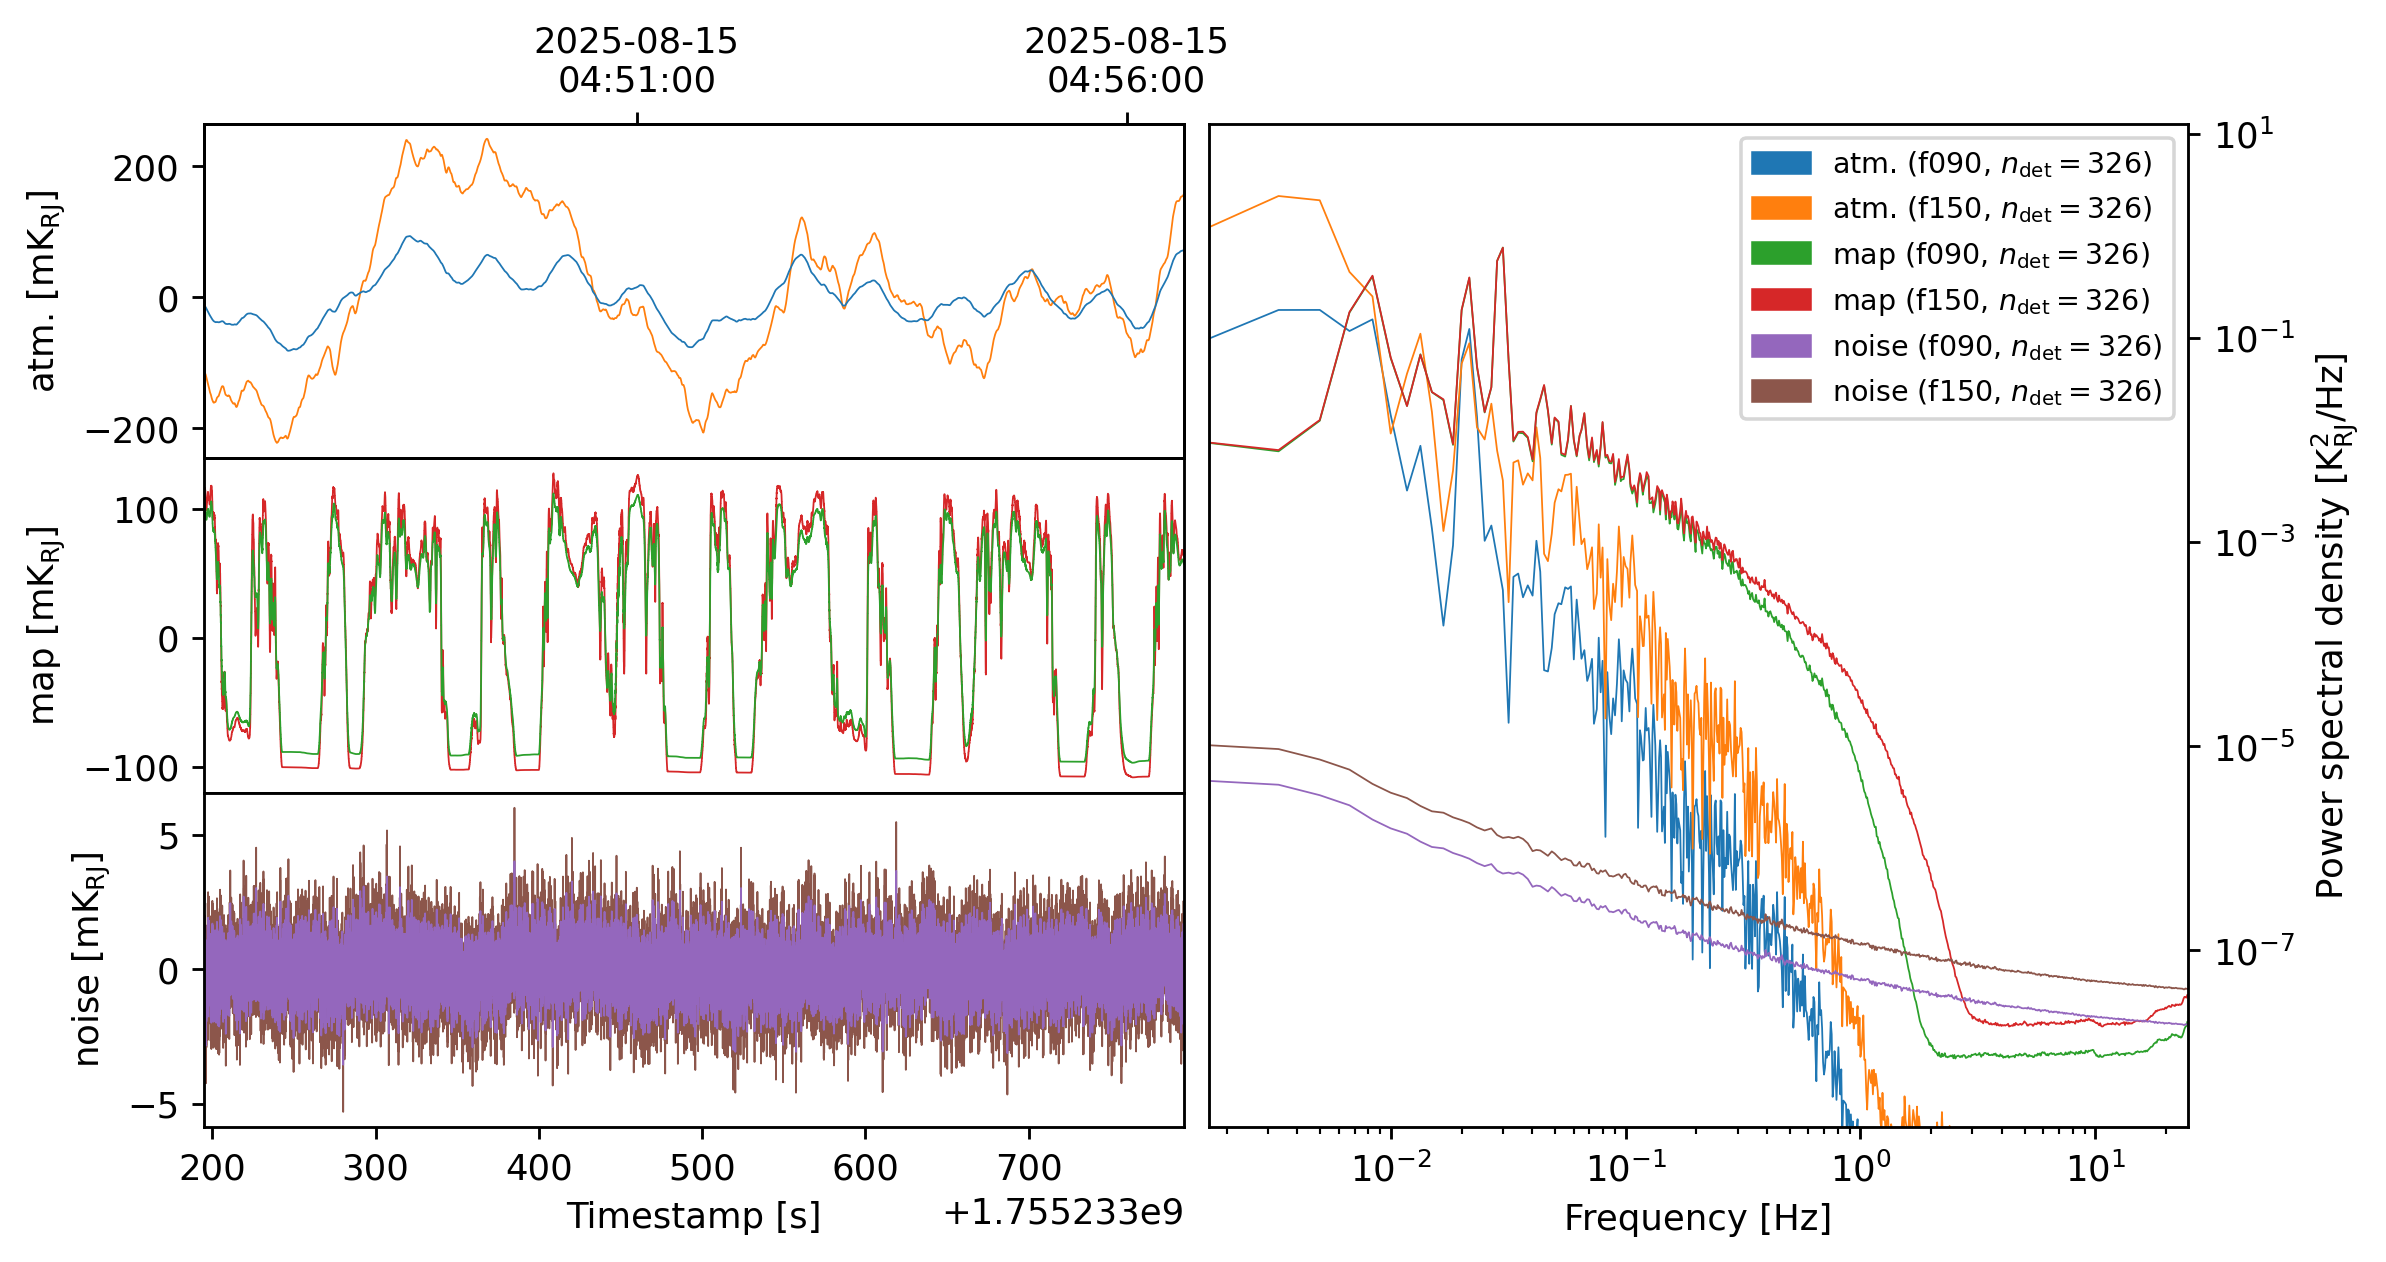

In [6]:
tods = sim.run()

print(tods)
tods[0].plot()

In [7]:
tods

[TOD(shape=(652, 30000), fields=['atmosphere', 'map', 'noise'], units='K_RJ', start=2025-08-15 04:56:35.064 +00:00, duration=600.0s, sample_rate=50.0Hz, metadata={'atmosphere': True, 'sim_time': <Arrow [2025-08-14T15:48:29.338317+00:00]>, 'altitude': 5064.0, 'region': 'chajnantor', 'pwv': 0.5, 'base_temperature': 272.44}),
 TOD(shape=(652, 15000), fields=['atmosphere', 'map', 'noise'], units='K_RJ', start=2025-08-15 05:02:12.564 +00:00, duration=300.0s, sample_rate=50.0Hz, metadata={'atmosphere': True, 'sim_time': <Arrow [2025-08-14T15:49:16.869833+00:00]>, 'altitude': 5064.0, 'region': 'chajnantor', 'pwv': 0.878, 'base_temperature': 272.423})]

In [8]:
from maria.mappers import BinMapper

mapper = BinMapper(
    center=(0, -23),
    stokes="IQU",
    frame="ra/dec",
    width=1.0,
    height=1.0,
    resolution=1.0 / 256,
    tod_preprocessing={
        "window": {"name": "tukey", "kwargs": {"alpha": 0.1}},
        "remove_spline": {"knot_spacing": 30, "remove_el_gradient": True},
        "remove_modes": {"modes_to_remove": [0]},
    },
    map_postprocessing={
        "gaussian_filter": {"sigma": 1},
        # "median_filter": {"size": 1},
    },
    units="mK_RJ",
)

mapper.add_tods(tods)

output_map = mapper.run()

print(output_map)

Mapping band f090:   0%|          | 0/3 [00:00<?, ?it/s]

Mapping band f090:   0%|          | 0/3 [00:00<?, ?it/s, band=f090, stokes=I]

Mapping band f090:   0%|          | 0/3 [00:00<?, ?it/s, band=f090, stokes=Q]

Mapping band f090:  67%|██████▋   | 2/3 [00:00<00:00, 10.96it/s, band=f090, stokes=Q]

Mapping band f090:  67%|██████▋   | 2/3 [00:00<00:00, 10.96it/s, band=f090, stokes=U]

Mapping band f090: 100%|██████████| 3/3 [00:00<00:00, 10.94it/s, band=f090, stokes=U]

Mapping band f090:   0%|          | 0/3 [00:00<?, ?it/s]

Mapping band f090:   0%|          | 0/3 [00:00<?, ?it/s, band=f090, stokes=I]

Mapping band f090:   0%|          | 0/3 [00:00<?, ?it/s, band=f090, stokes=Q]

Mapping band f090:   0%|          | 0/3 [00:00<?, ?it/s, band=f090, stokes=U]

Mapping band f090: 100%|██████████| 3/3 [00:00<00:00, 23.41it/s, band=f090, stokes=U]

Mapping band f090: 100%|██████████| 3/3 [00:00<00:00, 23.28it/s, band=f090, stokes=U]


2025-08-14 15:49:30.659 INFO: Ran mapper for band f090 in 5.334 s.


Mapping band f150:   0%|          | 0/3 [00:00<?, ?it/s]

Mapping band f150:   0%|          | 0/3 [00:00<?, ?it/s, band=f150, stokes=I]

Mapping band f150:   0%|          | 0/3 [00:00<?, ?it/s, band=f150, stokes=Q]

Mapping band f150:  67%|██████▋   | 2/3 [00:00<00:00, 11.33it/s, band=f150, stokes=Q]

Mapping band f150:  67%|██████▋   | 2/3 [00:00<00:00, 11.33it/s, band=f150, stokes=U]

Mapping band f150: 100%|██████████| 3/3 [00:00<00:00, 11.31it/s, band=f150, stokes=U]

Mapping band f150:   0%|          | 0/3 [00:00<?, ?it/s]

Mapping band f150:   0%|          | 0/3 [00:00<?, ?it/s, band=f150, stokes=I]

Mapping band f150:   0%|          | 0/3 [00:00<?, ?it/s, band=f150, stokes=Q]

Mapping band f150:   0%|          | 0/3 [00:00<?, ?it/s, band=f150, stokes=U]

Mapping band f150: 100%|██████████| 3/3 [00:00<00:00, 32.27it/s, band=f150, stokes=U]


2025-08-14 15:49:35.809 INFO: Ran mapper for band f150 in 5.138 s.


ProjectedMap:
  shape(stokes, nu, y, x): (3, 2, 256, 256)
  stokes: IQU
  nu: [ 90. 150.] GHz
  t: naive
  z: naive
  quantity: rayleigh_jeans_temperature
  units: mK_RJ
    min: -2.395e+02
    max: 1.957e+02
  center:
    ra:  00ʰ00ᵐ0.00ˢ
    dec: -23°00’0.00”
  size(y, x): (1°, 1°)
  resolution(y, x): (14.06”, 14.06”)
  beam(maj, min, rot): (0 rad, 0 rad, 0 rad)
  memory: 6.291 MB


Note that we can't see any of the circular polarization, since our instrument isn't sensitive to it.

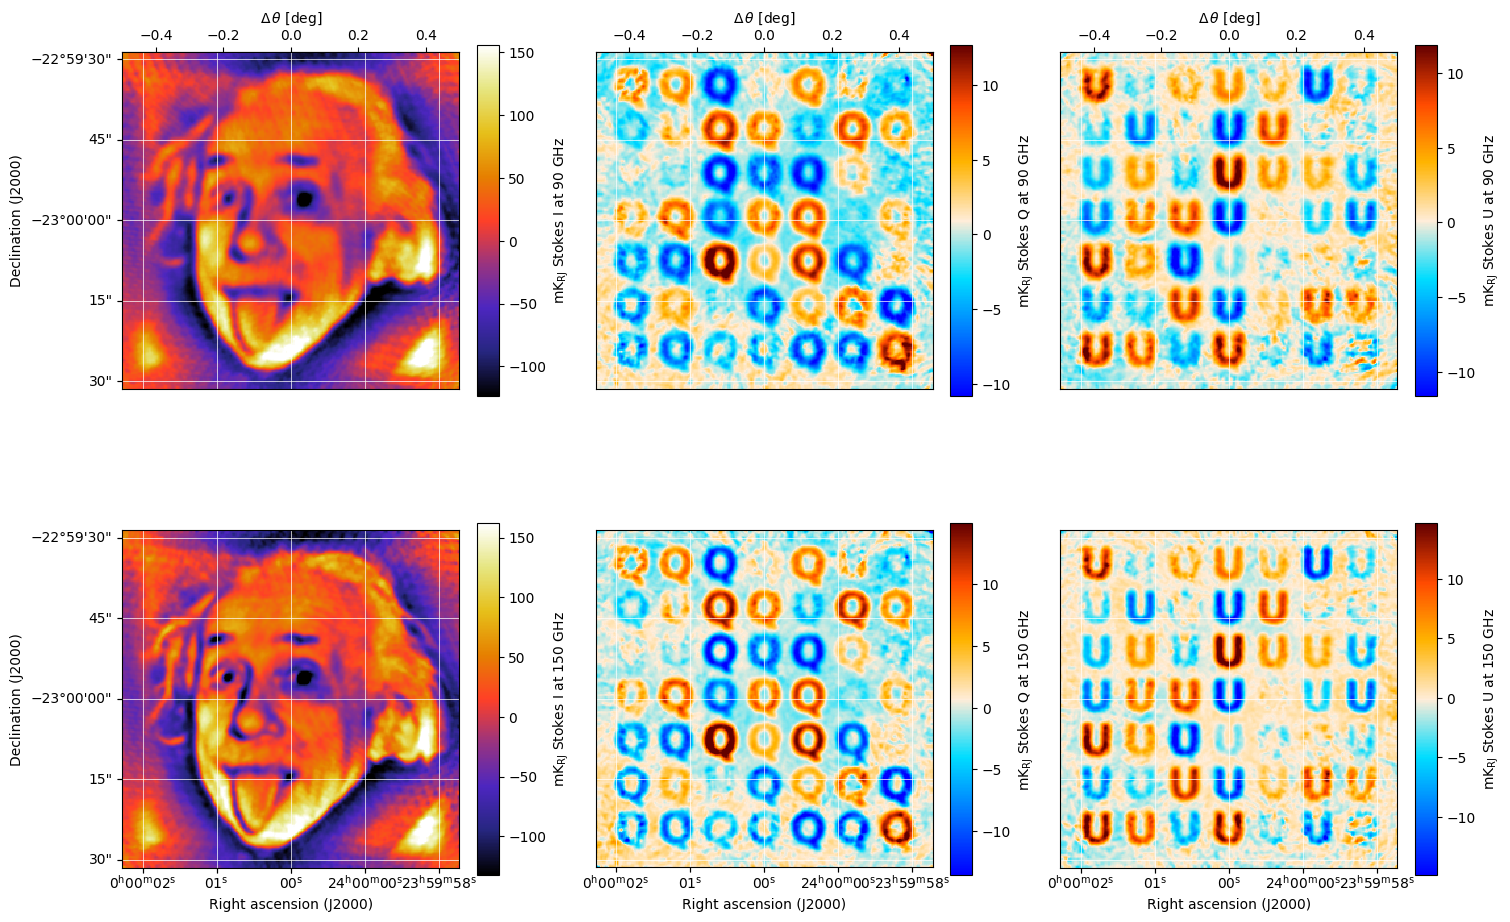

In [9]:
output_map.plot(stokes=["I", "Q", "U"], nu_index=[[0], [1]])